# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objs as go

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

C:\Users\DEL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


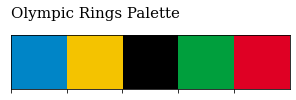

In [2]:
olympic_colors = ['4', '#F4C300', '#000000', '#009F3D', '#DF0024']  # Blue, Yellow, Black, Green, Red

sns.palplot(olympic_colors)
plt.title("Olympic Rings Palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [3]:
athlete_df = pd.read_csv("athletes.csv")
athlete_df.head()

code                              name         name_short  \
0  1537090                  IBRAGIMOV Server        IBRAGIMOV S   
1  1538589              MAMAJONOVA Shakhnoza       MAMAJONOVA S   
2  1538821      SOL CERVANTES Robiel Yankiel   SOL CERVANTES RY   
3  1538898  ESTEBAN VILLATORO Ericka Violeta  ESTEBAN VILLATORO   
4  1539793                    FRANKO Antonio           FRANKO A   

                            name_tv  gender function country_code     country  \
0                  Server IBRAGIMOV    Male  Athlete          UZB  Uzbekistan   
1              Shakhnoza MAMAJONOVA  Female  Athlete          UZB  Uzbekistan   
2      Robiel Yankiel SOL CERVANTES    Male  Athlete          CUB        Cuba   
3  Ericka Violeta ESTEBAN VILLATORO  Female  Athlete          GUA   Guatemala   
4                    Antonio FRANKO    Male  Athlete          CRO     Croatia   

  country_long nationality  ...  \
0   Uzbekistan  Uzbekistan  ...   
1   Uzbekistan  Uzbekistan  ...   
2         Cuba        Cuba  ...   
3    Guatemala   Guatemala  ...   
4      Croatia     Croatia  ...   

                                           coach  \
0          Natalia Efimova [personal], from 2014   
1                                            NaN   
2  Luis Alberto Bueno [personal], CUB, from 2019   
3                Marvin Gabriel Tumax [national]   
4                Kristina Skroce [national], CRO   

                                              reason  \
0  He tried powerlifting and athletics before swi...   
1                                                NaN   
2                                                NaN   
3  She was spotted by coach Marvin Gabriel Tumax ...   
4  He was encouraged to take up Para sports by Cr...   

                                 hero  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3  Her mother. (Athlete, 23 Aug 2021)   
4                                 NaN   

                                   influence  \
0                                        NaN   
1                                        NaN   
2  His mother. (guerrillero.cu, 31 Aug 2021)   
3         Her family. (Athlete, 23 Aug 2021)   
4                                        NaN   

                                          philosophy sporting_relatives  \
0                                                NaN                NaN   
1                                                NaN                NaN   
2                                                NaN                NaN   
3  "You have to suffer so you can reach your goal...                NaN   
4  "We can all make our dreams come true and achi...                NaN   

  ritual other_sports discipline event  
0    NaN          NaN        NaN   NaN  
1    NaN          NaN        NaN   NaN  
2    NaN          NaN        NaN   NaN  
3    NaN          NaN        NaN   NaN  
4    NaN          NaN        NaN   NaN  

[5 rows x 37 columns]

In [4]:
athlete_df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_long', 'nationality',
       'nationality_long', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports', 'discipline', 'event'],
      dtype='object')

In [5]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                4459 non-null   int64  
 1   name                4459 non-null   object 
 2   name_short          4456 non-null   object 
 3   name_tv             4456 non-null   object 
 4   gender              4459 non-null   object 
 5   function            4459 non-null   object 
 6   country_code        4459 non-null   object 
 7   country             4459 non-null   object 
 8   country_long        4459 non-null   object 
 9   nationality         4455 non-null   object 
 10  nationality_long    4455 non-null   object 
 11  nationality_code    4455 non-null   object 
 12  height              4456 non-null   float64
 13  weight              4454 non-null   float64
 14  disciplines         4456 non-null   object 
 15  events              4456 non-null   object 
 16  birth_

In [6]:
athlete_df = athlete_df.dropna(subset=['height', 'weight'])

In [7]:
athlete_df['birth_date'].head()

0    1978-11-28
1    1998-05-04
2    2003-05-01
3    2001-07-12
4    1992-11-09
Name: birth_date, dtype: object

Age Distribution of Athletes

In [8]:
athlete_df['birth_date'] = pd.to_datetime(athlete_df['birth_date'])

# Calculate age of each athlete
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

athlete_df['age'] = athlete_df['birth_date'].apply(calculate_age)

# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(athlete_df['age'], bins=10, kde=False, color='#0085C7')  # Using one of the Olympic colors
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
gender = athlete_df['gender']

Gender Distribution

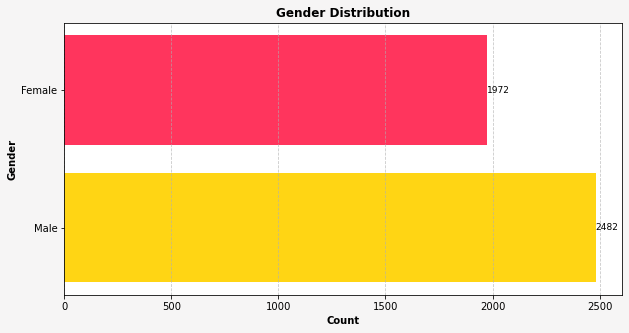

In [10]:
# Count the number of occurrences of each gender
gender_counts = gender.value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 5), facecolor='#f6f5f5')

# Plot horizontal bar chart
plt.barh(gender_counts.index, gender_counts.values, color=['#ffd514', '#ff355d'])

# Add labels and title
plt.xlabel('Count', fontsize=10, weight='bold')
plt.ylabel('Gender', fontsize=10, weight='bold')
plt.title('Gender Distribution', fontsize=12, weight='bold')

# Add value labels to bars
for index, value in enumerate(gender_counts.values):
    plt.text(value, index, f'{value}', va='center', fontsize=9, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Number of Athletes per Country

In [75]:
# Count the number of athletes from each country
country_counts = athlete_df['country'].value_counts()

# Select the top 20 countries based on athlete count
top_20_countries = country_counts.nlargest(20)

# Create a line plot for the number of athletes by top 20 countries
plt.figure(figsize=(12, 8), facecolor='#f6f5f5')

# Create the line plot
sns.lineplot(x=top_20_countries.index, y=top_20_countries.values, marker='o', color='gold')

# Customize the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.title('Top 20 Countries by Number of Athletes', fontsize=14)

# Add value labels for each point
for i, value in enumerate(top_20_countries.values):
    plt.text(i, value, str(value), fontsize=10, ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', color='#EEEEEE', linewidth=0.4)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

Athletes Participation by Region

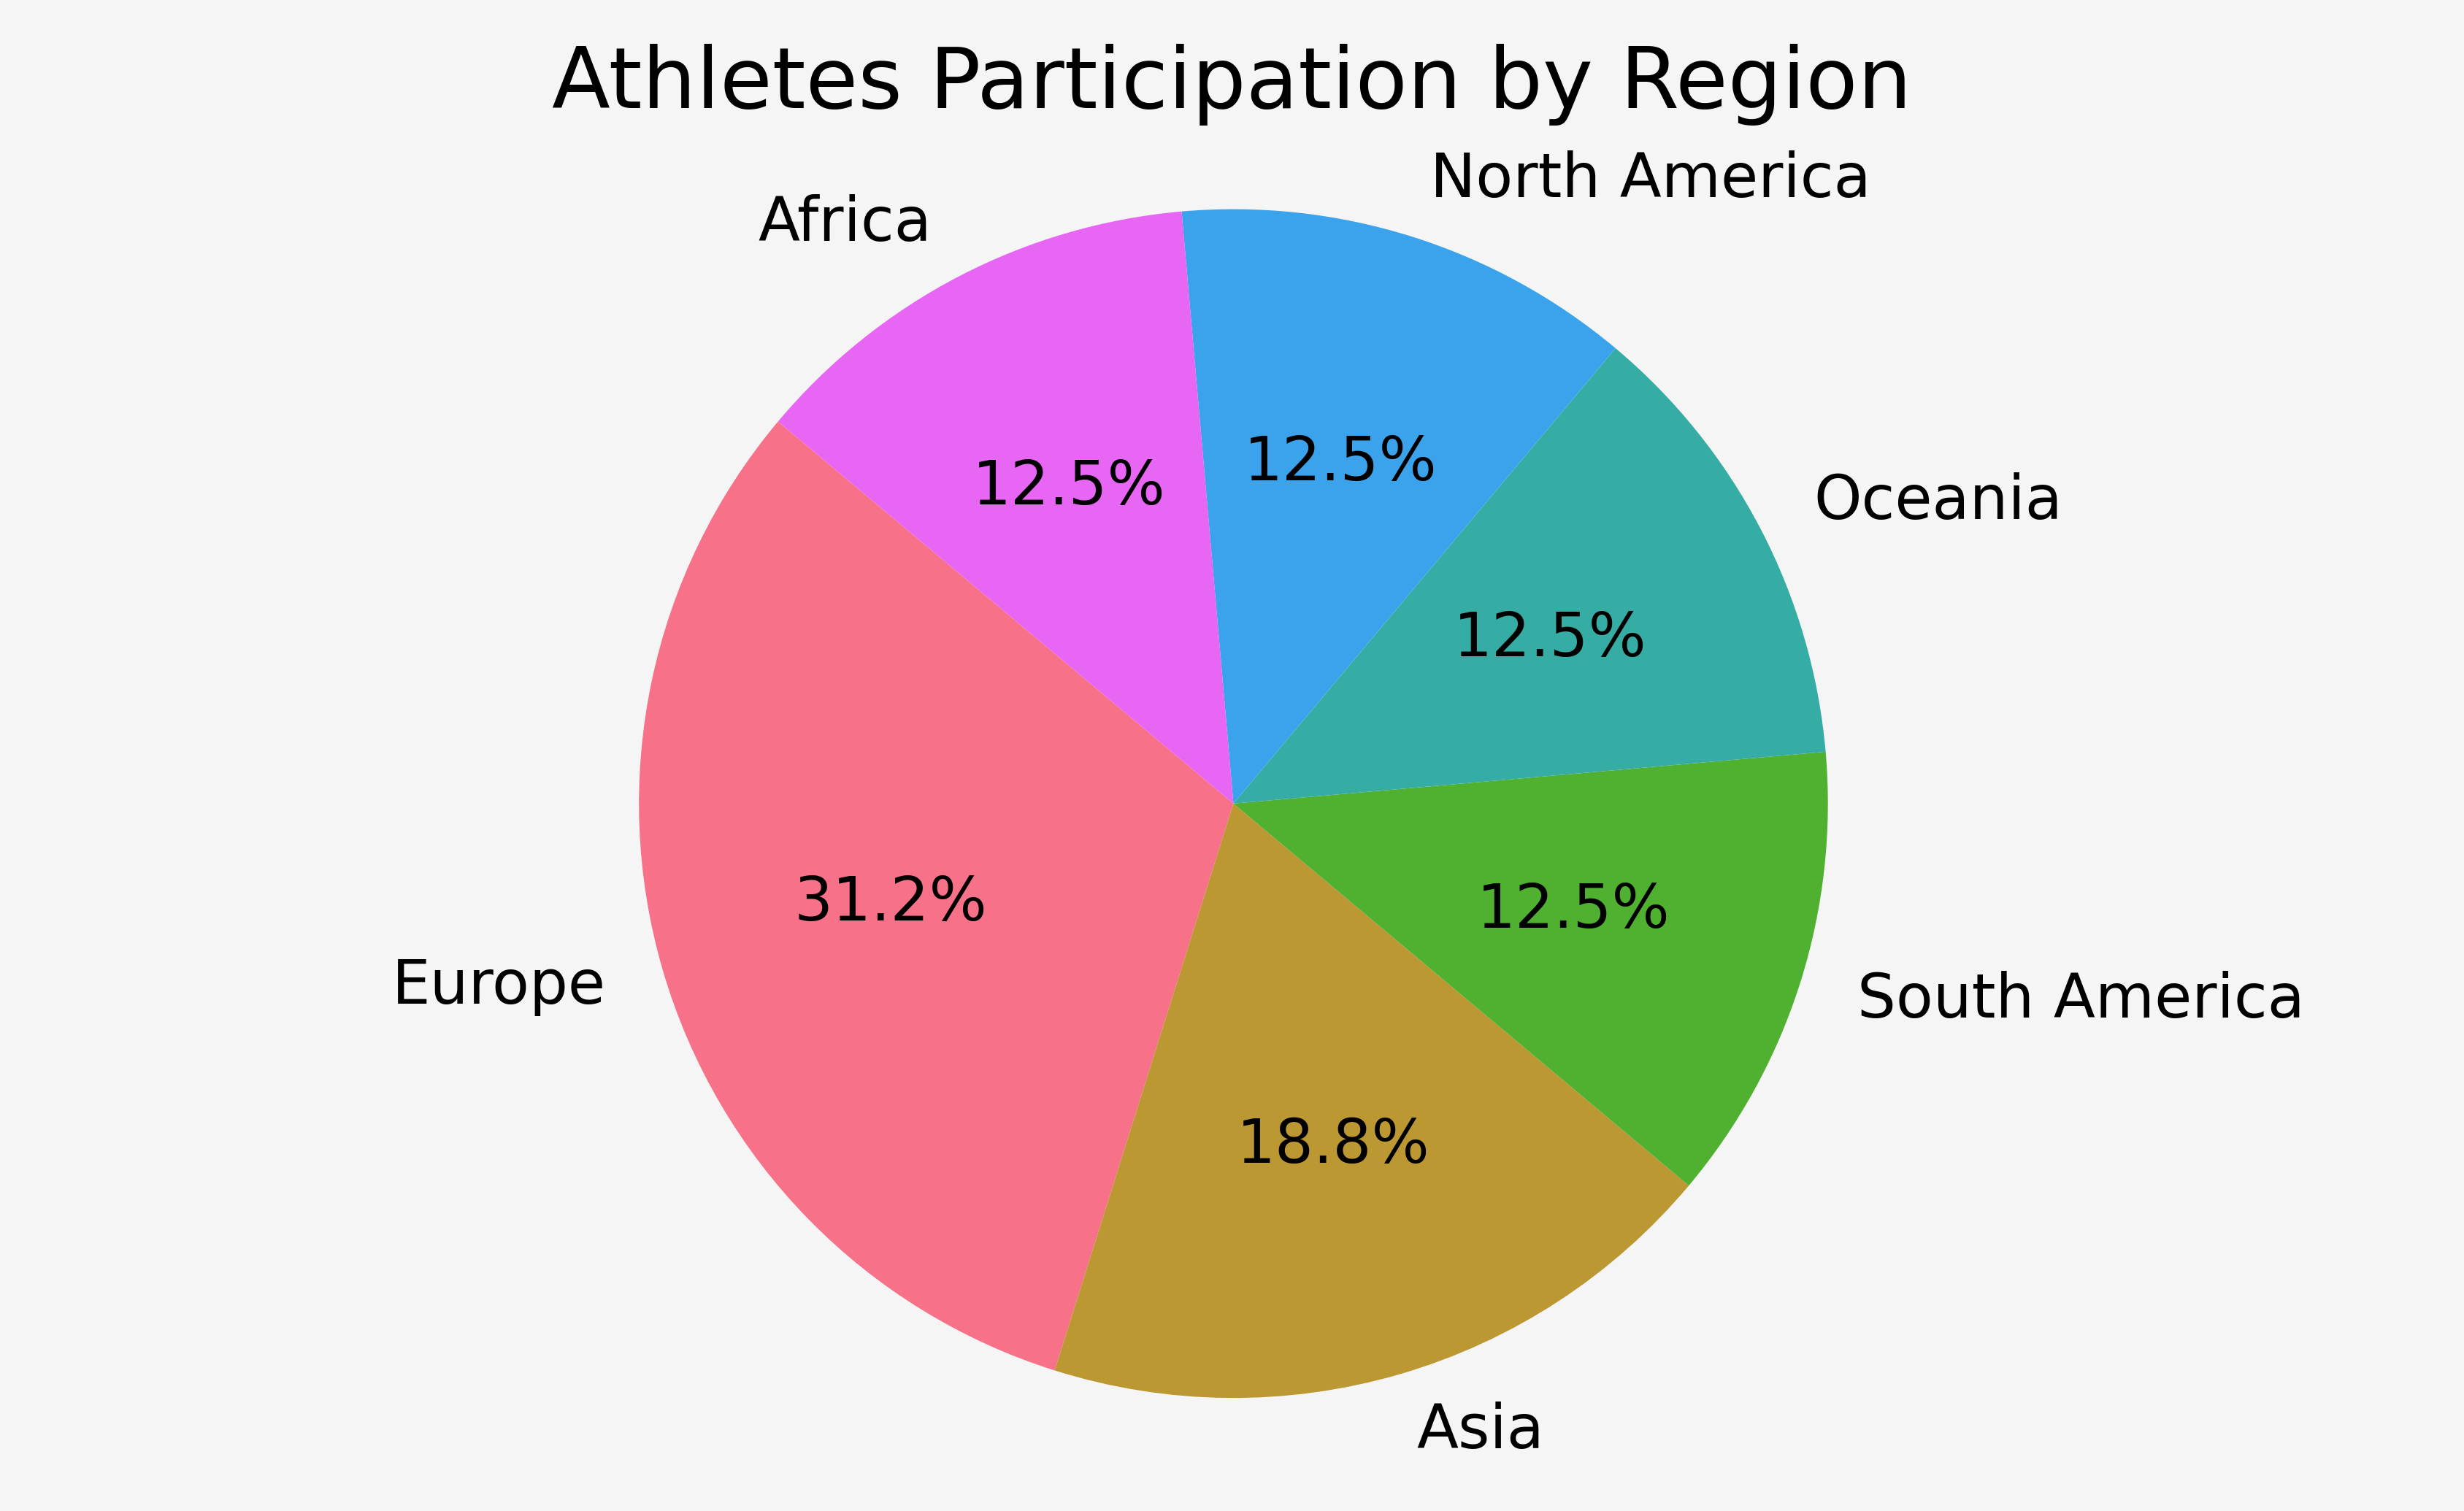

In [82]:
country_region_df = pd.read_csv('country_regions.csv')

# Count the number of athletes from each country
country_counts = athlete_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'athlete_count']

# Merge the athletes count with the country-region mapping
merged_df = country_counts.merge(country_region_df, on='country', how='left')

# Count the number of athletes by region
region_counts = merged_df['region'].value_counts()

# Create a pie chart for athletes by region
plt.figure(figsize=(7, 4), facecolor='#f6f5f5')
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(region_counts)))
plt.title('Athletes Participation by Region', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [15]:
teams = pd.read_csv("teams.csv")
medals=pd.read_csv("medals.csv")
medallist=pd.read_csv("medallists.csv")
medals_total=pd.read_csv("medals_total.csv")

Medal Tally

In [42]:
# Medal distribution by gender
gender_success = medallist['gender'].value_counts()

In [43]:
gender_success.plot(kind='bar', figsize=(8, 4), color=['skyblue', 'lightcoral'])
plt.title('Medal Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

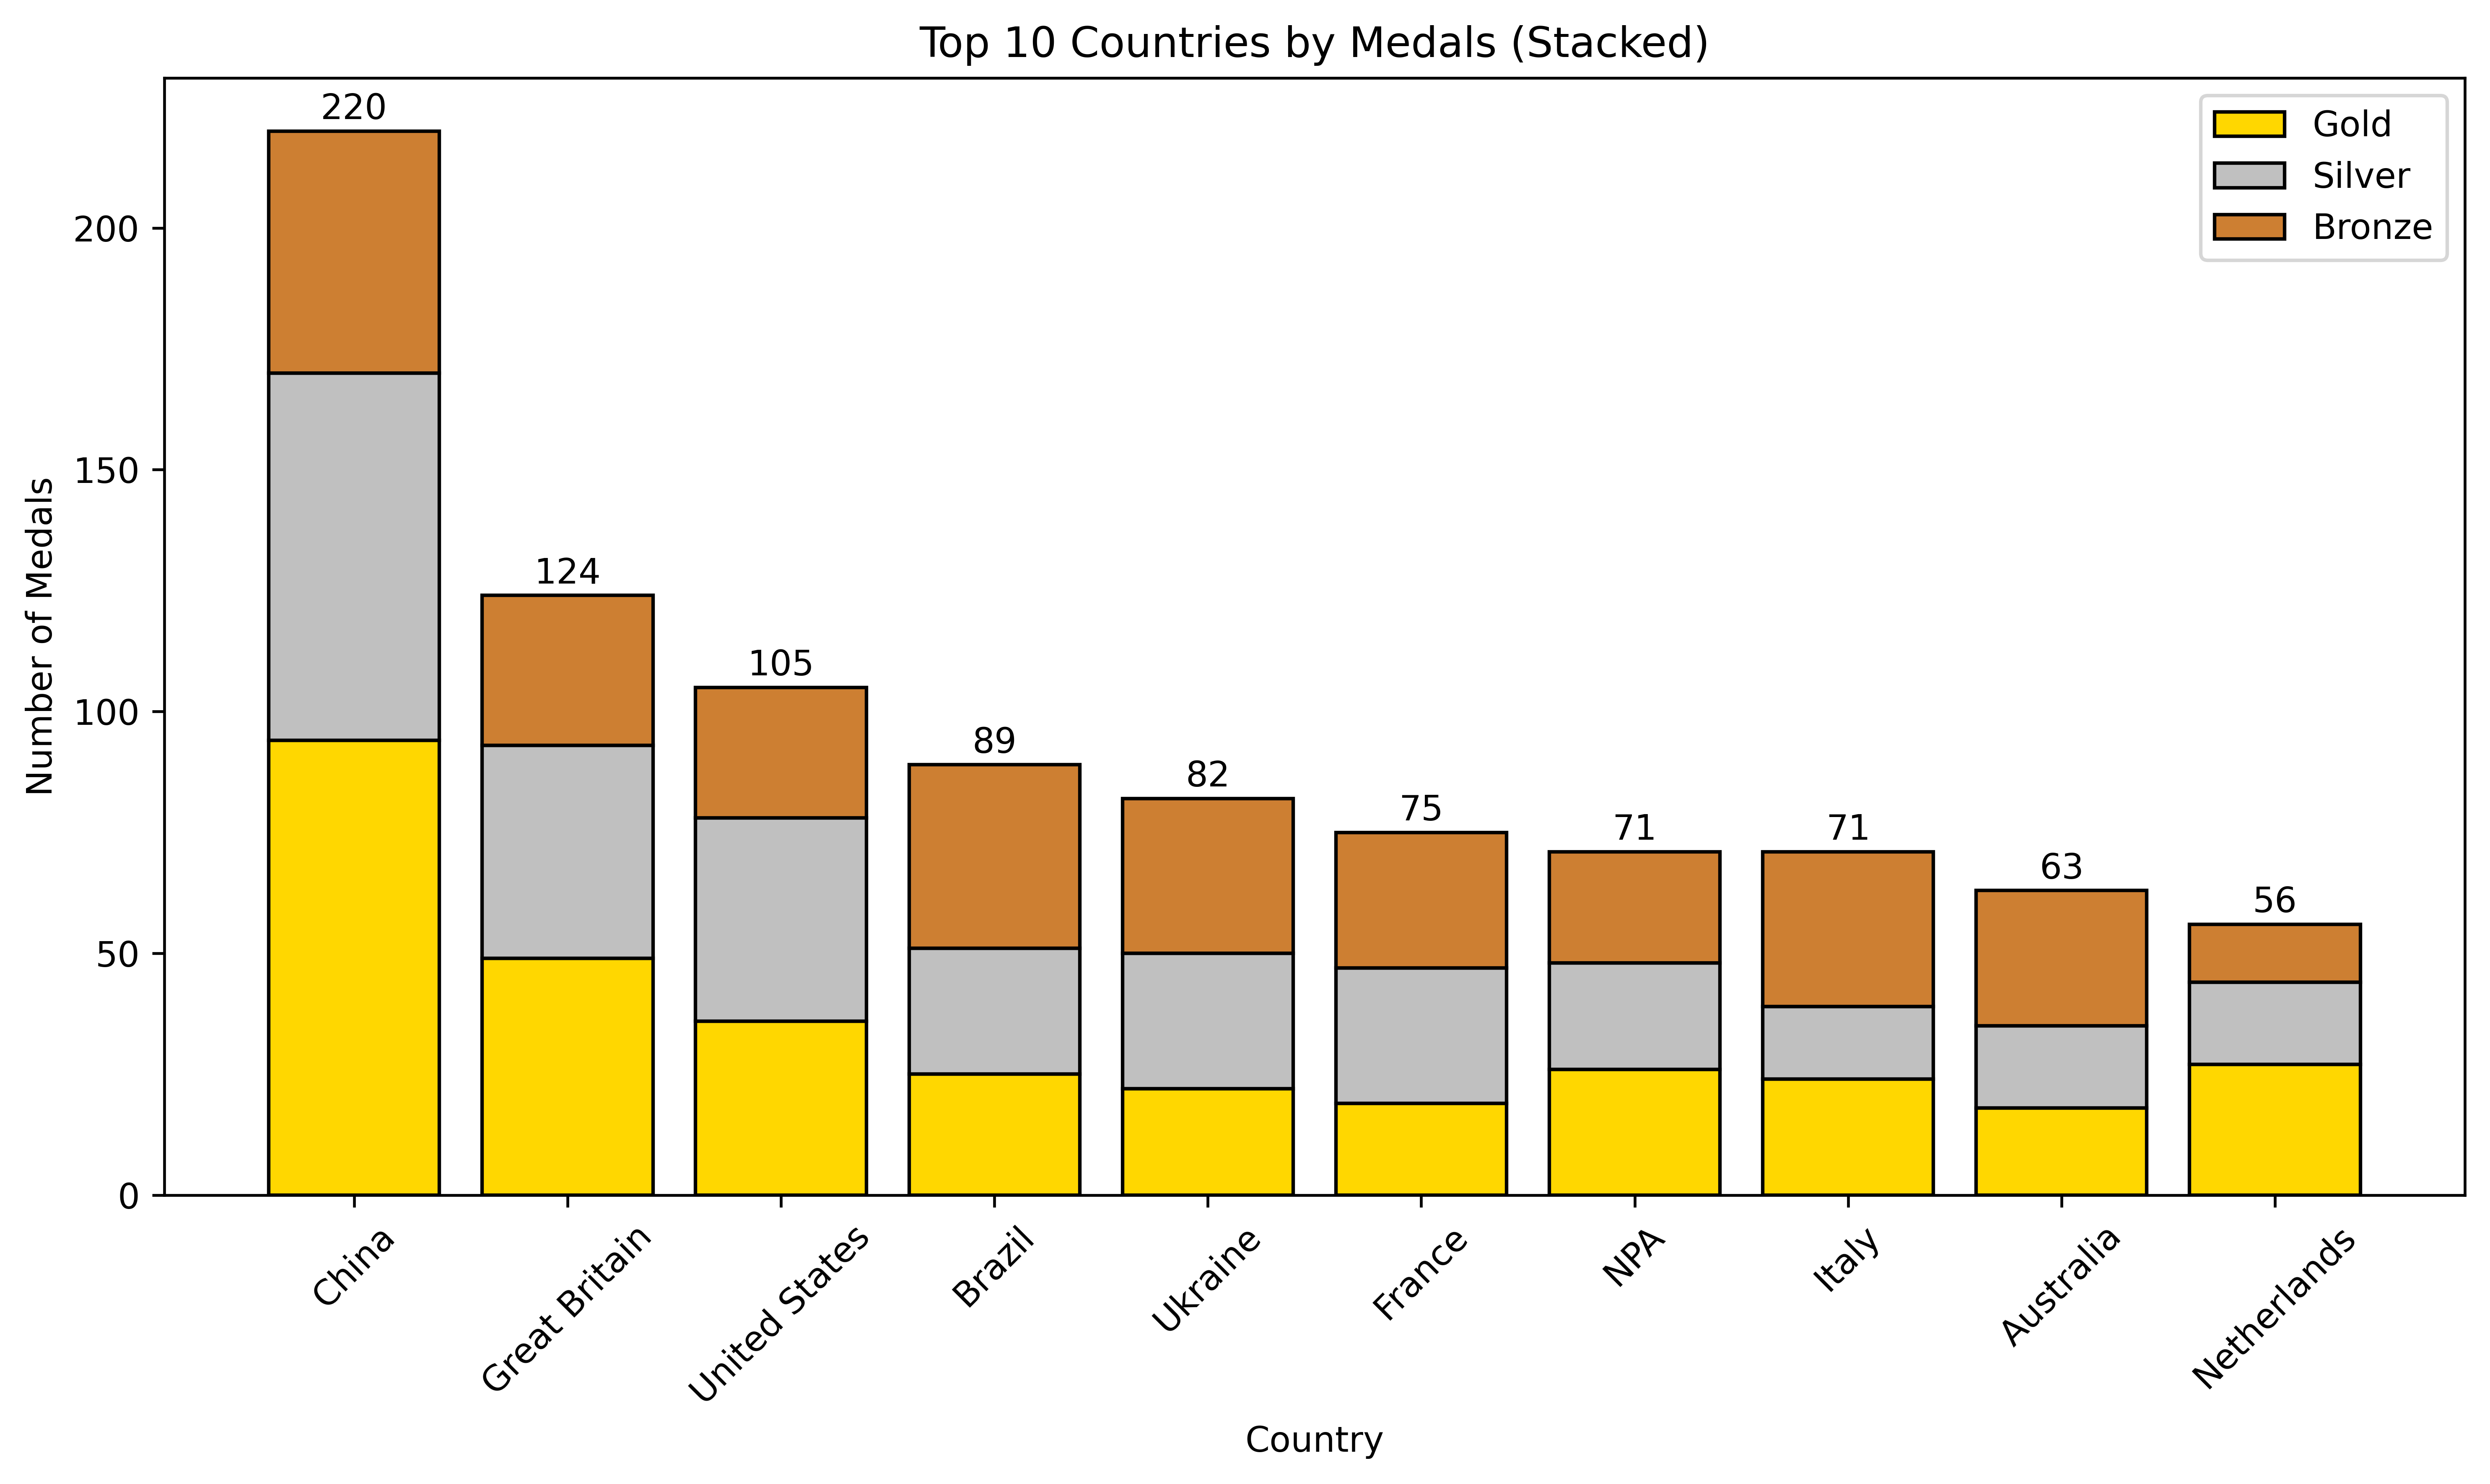

In [61]:
medals_total['Total Medals'] = medals_total['Gold Medal'] + medals_total['Silver Medal'] + medals_total['Bronze Medal']

# Filter countries that have won at least 1 medal of any type
medals_total = medals_total[(medals_total['Gold Medal'] > 0) | (medals_total['Silver Medal'] > 0) | (medals_total['Bronze Medal'] > 0)]

# Select the top 10 countries based on total medals
top_10_countries = medals_total.nlargest(10, 'Total Medals')

# Create a new DataFrame for stacking
stacked_data = top_10_countries[['country', 'Gold Medal', 'Silver Medal', 'Bronze Medal']]

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Create the stacked bar plot
plt.bar(stacked_data['country'], stacked_data['Gold Medal'], color='#FFD700', label='Gold', edgecolor='black')  # Gold color
plt.bar(stacked_data['country'], stacked_data['Silver Medal'], bottom=stacked_data['Gold Medal'], color='#C0C0C0', label='Silver', edgecolor='black')  # Silver color
plt.bar(stacked_data['country'], stacked_data['Bronze Medal'], bottom=stacked_data['Gold Medal'] + stacked_data['Silver Medal'], color='#CD7F32', label='Bronze', edgecolor='black')  # Bronze color

# Set labels and title
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.title('Top 10 Countries by Medals (Stacked)')

# Add legend
plt.legend()

# Annotate total medals at the top of each stacked bar
for i in range(len(stacked_data)):
    total_medals = stacked_data['Gold Medal'].iloc[i] + stacked_data['Silver Medal'].iloc[i] + stacked_data['Bronze Medal'].iloc[i]
    plt.text(i, total_medals + 1, int(total_medals), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [40]:
gold_medal_countries = medals_total[medals_total['Gold Medal'] > 0]

# Sort the countries by the number of gold medals in descending order
gold_medal_countries = gold_medal_countries.sort_values(by='Gold Medal', ascending=False)

# Select the top 10 countries
top_10_countries = gold_medal_countries.head(10)

# Create the bar plot with gold-colored bars
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['country'], top_10_countries['Gold Medal'], color='#FFD700')  # '#FFD700' is the color code for gold

# Set labels and title
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')
plt.title('Top 10 Countries by Gold Medals')

# Show the plot
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [46]:
# Filter countries that have won at least 1 silver medal
silver_medal_countries = medals_total[medals_total['Silver Medal'] > 0]

# Sort the countries by the number of silver medals in descending order
silver_medal_countries = silver_medal_countries.sort_values(by='Silver Medal', ascending=False)

# Select the top 10 countries
top_10_silver_countries = silver_medal_countries.head(10)

# Create the bar plot with silver-colored bars
plt.figure(figsize=(10, 6))
plt.barh(top_10_silver_countries['country'], top_10_silver_countries['Silver Medal'], color='#C0C0C0')  # '#C0C0C0' is the color code for silver

# Set labels and title
plt.xlabel('Number of Silver Medals')
plt.ylabel('Country')
plt.title('Top 10 Countries by Silver Medals')

# Show the plot
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [48]:
bronze_medal_countries = medals_total[medals_total['Bronze Medal'] > 0]

# Sort the countries by the number of bronze medals in descending order
bronze_medal_countries = bronze_medal_countries.sort_values(by='Bronze Medal', ascending=False)

# Select the top 10 countries
top_10_bronze_countries = bronze_medal_countries.head(10)

# Create the bar plot with bronze-colored bars
plt.figure(figsize=(10, 6))
plt.barh(top_10_bronze_countries['country'], top_10_bronze_countries['Bronze Medal'], color='#CD7F32')  # '#CD7F32' is the color code for bronze

# Set labels and title
plt.xlabel('Number of Bronze Medals')
plt.ylabel('Country')
plt.title('Top 10 Countries by Bronze Medals')

# Show the plot
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()

In [62]:
medals_total.head()

fig = px.choropleth(medals_total, locations='country_code', color='Total', hover_name='country_code',
                    projection='natural earth', color_continuous_scale=px.colors.sequential.Blues,
                    title='Total Medals by Country')
fig.show()